In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime


import dash
from dash import html
from dash import dcc
import plotly.graph_objects as go
import plotly.express as px
from dash.dependencies import Input, Output

In [2]:
def formato_fecha(df):
    fechas = []
    for i in range(0, len(df)):
        fecha = str(datetime.date(int(df["Anio"][i]), int(df["Mes"][i]), 1))
        fechas.append(fecha)
    
    df["Fechas"] = fechas

In [3]:
imp_com_id = pd.read_csv("DatosImportacionCombustibles.csv")
con_com_id = pd.read_csv("DatosConsumoCombustibles.csv")

In [4]:
imp_com = imp_com_id.drop(columns = "Unnamed: 0")
con_com = con_com_id.drop(columns = "Unnamed: 0")

In [5]:
data_con = con_com.drop(columns = ['GLP',
       'GasolinaAviacion', 'Kerosina', 'TurboJet', 'Bunker', 'Asfalto',
       'PetCoke', 'AceitesLubricantes', 'GrasasLubricantes', 'Solventes',
       'Naftas', 'Ceras', 'CrudoNacional', 'Butano', 'Orimulsion',
       'MezclasOleosas', 'DieselULS', 'TotalGasolinas', "Total", "TotalDiesel"])

data_imp = imp_com.drop(columns = ['GLP',
       'GasolinaAviacion', 'Kerosina', 'TurboJet', 'Bunker', 'Asfalto',
       'PetCoke', 'AceitesLubricantes', 'GrasasLubricantes', 'Solventes',
       'Naftas', 'Ceras', 'Butano', 'PetroleoReconstit', 'MTBE', 'Orimulsion',
       'MezclasOleosas', 'PetroleoCrudo', 'DieselULS', 'TotalGasolinas', "TotalMensual", "TotalDiesel"])

In [6]:
def agregar_diesel(df):
    for i in range(0, len(df)):
        if df["Anio"][i] == 2018 or df["Anio"][i] == 2019 or df["Anio"][i] == 2020 or df["Anio"][i] == 2021:
            df["Diesel"][i] = df["DieselLS"][i]
        else:
            df["Diesel"][i] == df["Diesel"][i]

In [7]:
agregar_diesel(data_con)
agregar_diesel(data_imp)

<ipython-input-6-58d6877dc0a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Diesel"][i] = df["DieselLS"][i]


In [8]:
data_con.drop(columns = ["DieselLS"], inplace = True)
data_imp.drop(columns = ["DieselLS"],  inplace = True)

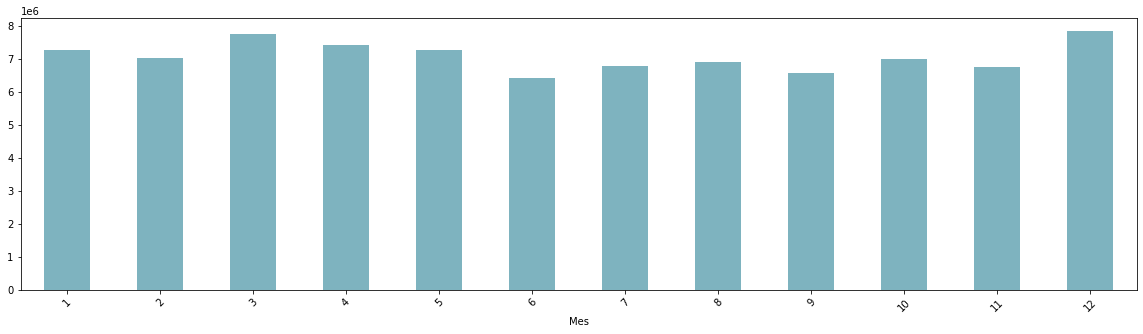

In [9]:
fig = plt.figure(figsize=(20,5)) 
data_con.groupby('Mes').GasolinaRegular.sum().plot.bar(color = "#7EB3BF")
plt.rcParams['axes.facecolor'] = 'white'
plt.xticks(rotation = 45)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

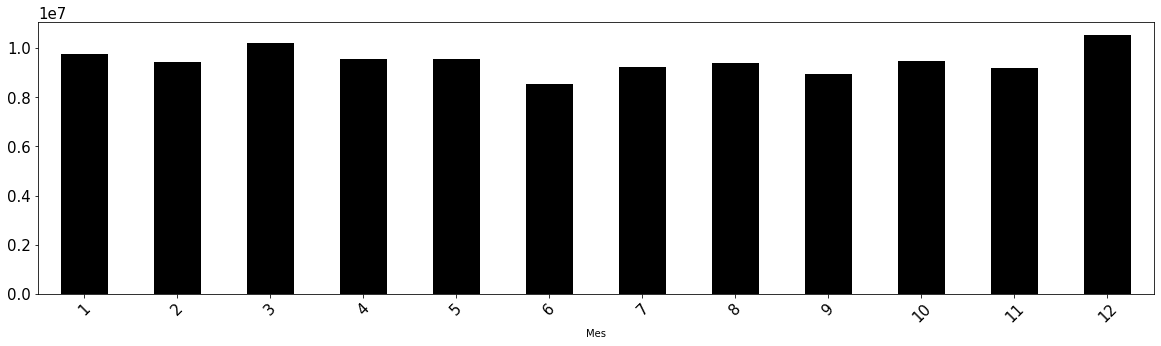

In [10]:
fig = plt.figure(figsize=(20,5)) 
data_con.groupby('Mes').GasolinaSuper.sum().plot.bar(color = "black")
plt.rcParams['axes.facecolor'] = 'white'
plt.xticks(rotation = 45)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

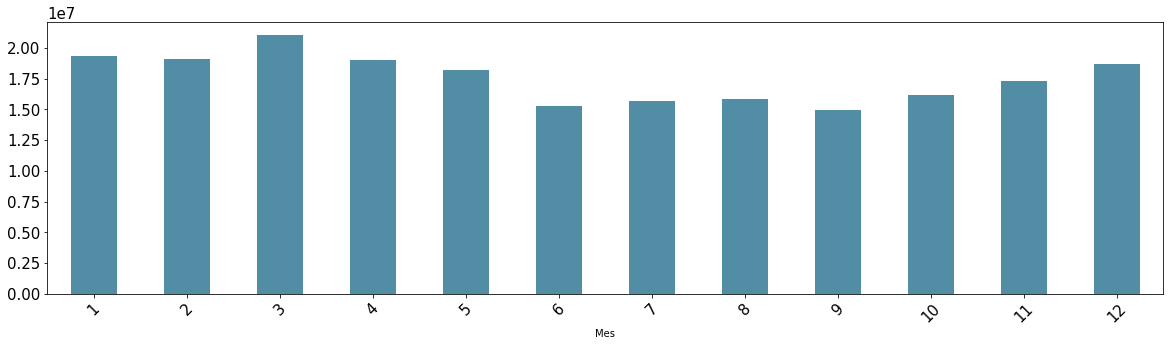

In [11]:
fig = plt.figure(figsize=(20,5)) 
data_con.groupby('Mes').Diesel.sum().plot.bar(color = "#518EA6")
plt.rcParams['axes.facecolor'] = 'white'
plt.xticks(rotation = 45)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

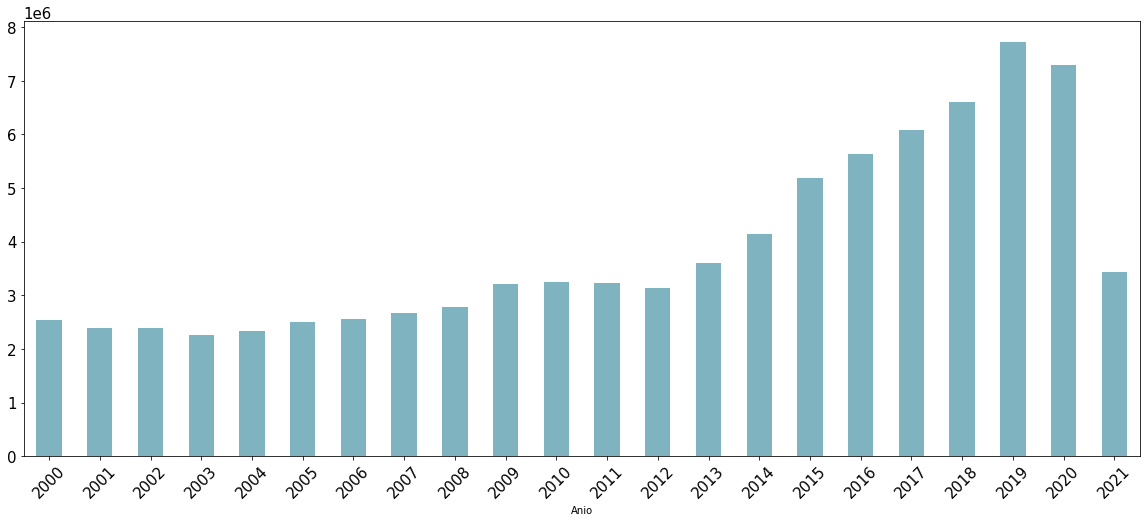

In [12]:
fig = plt.figure(figsize=(20,8))
data_con.groupby('Anio').GasolinaRegular.sum().plot.bar(color = "#7EB3BF")
plt.rcParams['axes.facecolor'] = 'white'
plt.xticks(rotation = 45)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

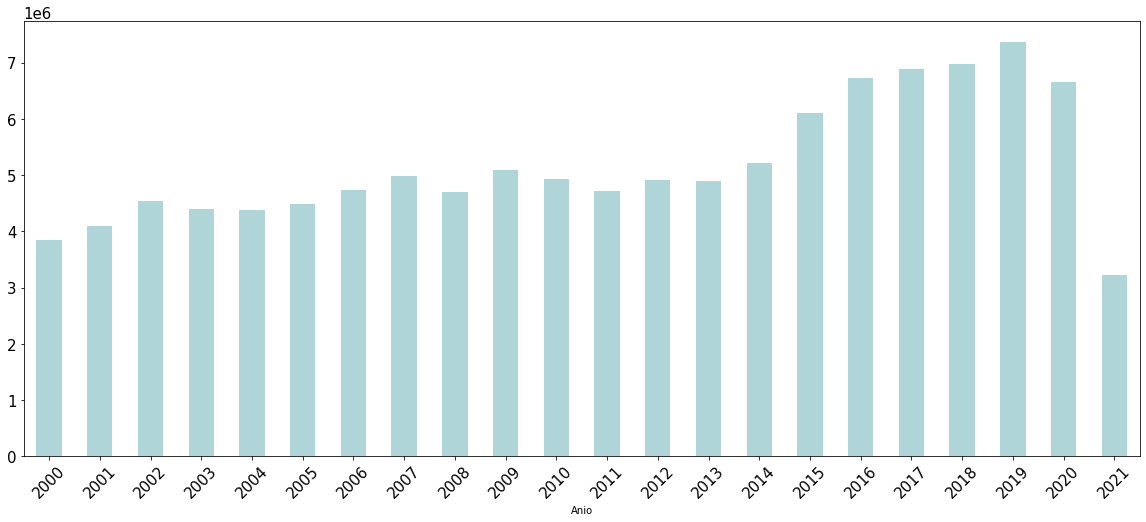

In [13]:
fig = plt.figure(figsize=(20,8))
data_con.groupby('Anio').GasolinaSuper.sum().plot.bar(color = "#B0D5D9")
plt.rcParams['axes.facecolor'] = 'white'
plt.xticks(rotation = 45)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

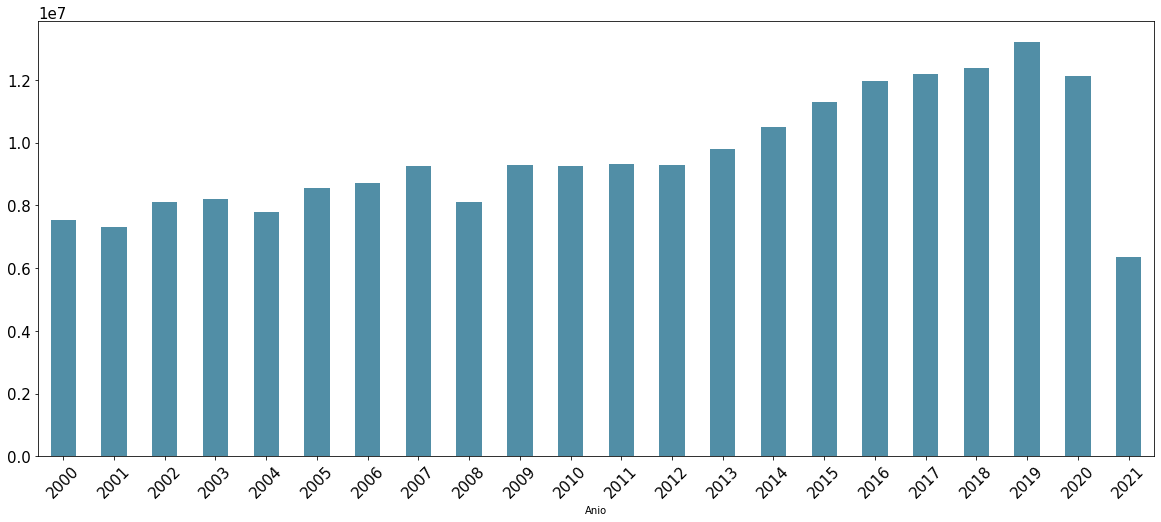

In [14]:
fig = plt.figure(figsize=(20,8))
data_con.groupby('Anio').Diesel.sum().plot.bar(color = "#518EA6")
plt.rcParams['axes.facecolor'] = 'white'
plt.xticks(rotation = 45)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

In [15]:
formato_fecha(data_con)
formato_fecha(data_imp)

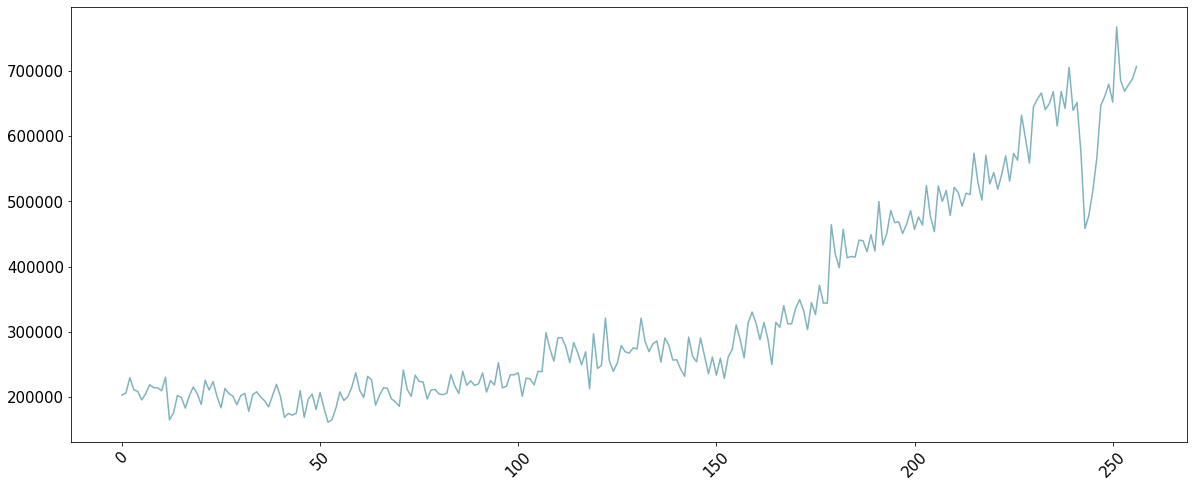

In [16]:
fig = plt.figure(figsize=(20,8))
data_con["GasolinaRegular"].plot(color = "#7EB3BF")
plt.rcParams['axes.facecolor'] = '#edc876'
plt.grid(color = "white")
plt.xticks(rotation=45)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

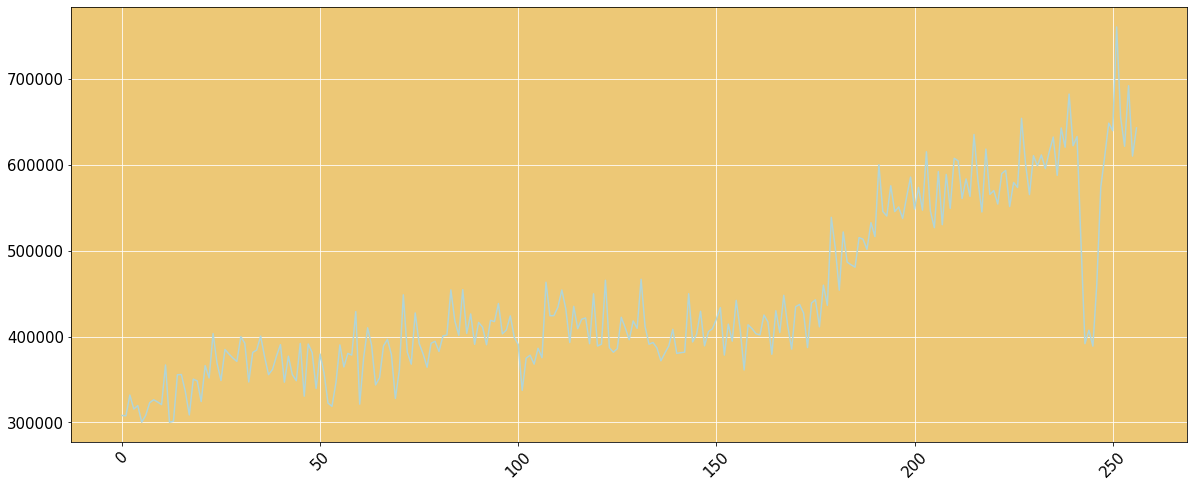

In [17]:
fig = plt.figure(figsize=(20,8))
data_con["GasolinaSuper"].plot(color = "#B0D5D9")
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(color = "white")
plt.xticks(rotation=45)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

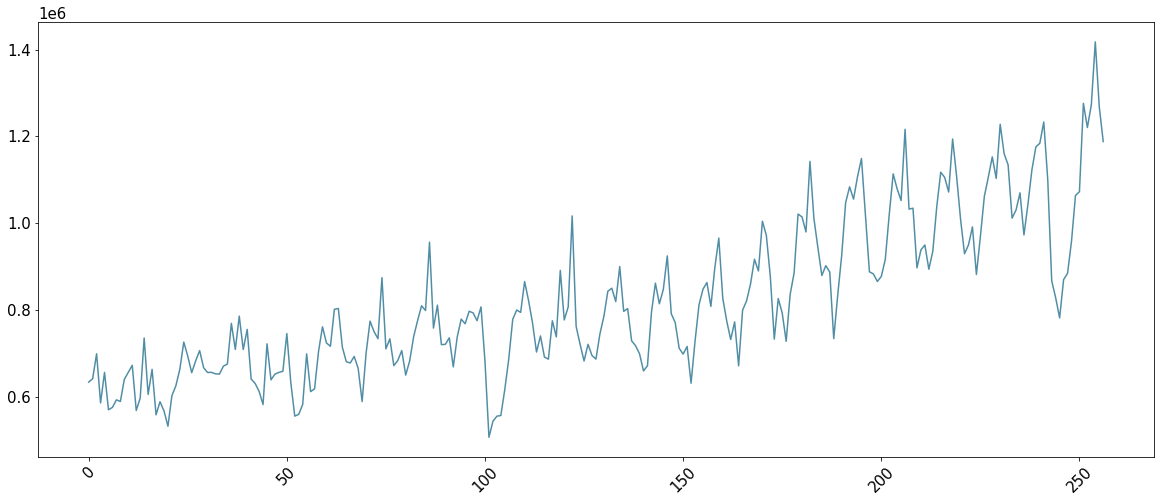

In [18]:
fig = plt.figure(figsize=(20,8))
data_con["Diesel"].plot(color = "#518EA6")
plt.rcParams['axes.facecolor'] = 'white'
plt.grid(color = "white")
plt.xticks(rotation=45)
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)

In [25]:
data_con = data_con.rename(columns = {"GasolinaRegular": "Regular", "GasolinaSuper": "Super"})
data_imp = data_imp.rename(columns = {"GasolinaRegular": "Regular", "GasolinaSuper": "Super"})

In [107]:
app = dash.Dash()

df = data_con
df2 = data_imp


app.layout = html.Div(id = 'parent', children = [
    html.H1(id = 'H1', children = 'Información sobre Gasolina', style = {'textAlign':'center',\
                                            'marginTop':40,'marginBottom':40}),

        dcc.Dropdown(id = 'dropdown',
        options = [
            {'label':'Diesel', 'value':'Diesel' },
            {'label': 'Regular', 'value':'Regular'},
            {'label': 'Super', 'value':'Super'},
            ],
        value = 'Diesel'),
        dcc.RangeSlider(id = "range_slider",
              min = 0,
              max = len(df),
              step = 1,
              value = [0, len(df)],
              marks = {str(i): str(i) for i in range(0, len(df), 10 )}),
        dcc.Graph(id = 'bar_plot'), 
        dcc.Graph(id = 'bar_plot_2'),

        ])


    
    
@app.callback(Output(component_id='bar_plot', component_property= 'figure'),
              Output(component_id='bar_plot_2', component_property= 'figure'),
              Input(component_id='dropdown', component_property= 'value'),
              Input(component_id = "range_slider", component_property = "value"))


def graph_update(dropdown_value, rslider_value):

    
    fig1 = go.Figure([go.Scatter(x = df['Fechas'][rslider_value[0]: rslider_value[len(rslider_value) - 1]], 
                                 y = df['{}'.format(dropdown_value)][rslider_value[0]: rslider_value[len(rslider_value) - 1]],\
                     line = dict(color = 'red', width = 5))])
    
    fig2 = go.Figure([go.Scatter(x = df2['Fechas'][rslider_value[0]: rslider_value[len(rslider_value) - 1]], 
                                 y = df2['{}'.format(dropdown_value)][rslider_value[0]: rslider_value[len(rslider_value) - 1]],\
                     line = dict(color = 'blue', width = 5))])
    
    fig1.update_layout(title = 'Consumo de gasolina ' + str(dropdown_value),
                      xaxis_title = str(np.abs(rslider_value[len(rslider_value) - 1]  - rslider_value[0])) +' Meses',
                      yaxis_title = 'Cantidad de Barriles Consumidos')
    
    fig2.update_layout(title = 'Importaciones de gasolina ' + str(dropdown_value),
                  xaxis_title = str(np.abs(rslider_value[len(rslider_value) - 1]  - rslider_value[0])) + ' Meses',
                  yaxis_title = 'Importaciones de Barriles Consumidos')
    
    return fig1, fig2

In [108]:
if __name__ == '__main__': 
    app.run_server()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

Dash is run

 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [19/Oct/2021 02:32:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 02:32:56] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 02:32:56] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 02:32:56] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 02:32:56] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 02:32:56] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 02:32:56] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 02:32:56] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 02:33:01] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [19/Oct/2021 02:33:05] "POST /_dash-update-component HTTP/1.1" 200 -
